**Table of Contents Notebooks**

[Introduction #1 - Python, Google Colab, Loading Data](https://colab.research.google.com/drive/16TzR2xYeLiye7Gt6KCsz5qCvhDZhVn2g?usp=sharing)

[Introduction #2 - Pandas, Baseball Savant Dataset](https://colab.research.google.com/drive/1rTZOQUGMZ-KVsuLhdKY87DfI5YAoHo3h?usp=sharing)  <-- *you're currently here*

[Getting Into It - Data Aggregation](https://colab.research.google.com/drive/1gjyj6qXUyW-hvT_MnuVZc0Ysx2xi4O8-?usp=sharing)

# Introduction

In this notebook, we'll be talking about some Pandas basics. Pandas is the Python package that we use for DataFrame (table) management. Since the Baseball Savant data comes in one huge dataframe, Pandas holds the keys to everything we're doing here.

The first part of this notebook will give you a better feel for what pandas is, and it will show you some basic code that shows you how to work with pandas.

The rest of the notebook will focus on the savant dataset itself. We need to have a pretty good understanding of what information is in the dataset and what the values in those columns are telling us. The code I show in that section will also contribute to part one, where you'll learn more and more about pandas and see how the code structure works.

# Setup

We went over importing functions and the data in the last notebook, so I won't focus on that. I will just put the cell blocks here to be run and then we'll move on.

**Install packages & import functions**

In [3]:
# Install pybaseball
!pip install pybaseball
!pip install unidecode

# Import packages
import pandas as pd, pybaseball as pyb, numpy as np
from datetime import date
from unidecode import unidecode

# Establish today's date for data loading purposes
today = date.today()
if (today.month < 10) & (today.day < 10):
  todaysdate = str(today.year) + '-0' + str(today.month) + '-0' + str(today.day)
elif (today.month < 10) & (today.day >= 10):
  todaysdate = str(today.year) + '-0' + str(today.month) + '-' + str(today.day)
elif (today.month >= 10) & (today.day < 10):
  todaysdate = str(today.year) + '-' + str(today.month) + '-0' + str(today.day)
else:
  todaysdate = str(today.year) + '-' + str(today.month) + '-' + str(today.day)

     |████████████████████████████████| 415 kB 7.6 MB/s 
     |████████████████████████████████| 291 kB 43.0 MB/s 
     |████████████████████████████████| 856 kB 38.6 MB/s 
     |████████████████████████████████| 235 kB 5.1 MB/s 


**Load Data**

If you've saved the data to your Google drive already, edit this cell with the correct file location/name and run it

In [ ]:
sav = pd.read_csv('/content/drive/My Drive/SavantLearning/savantdata.csv')

If you haven't saved the data, reload it by running this cell, it will take some time. 

If this cell is commented out, remove the three quotes at the beginning and end to un-comment the code and then run it.

In [ ]:
'''
def loadSav(startdate, enddate):
  sav = pyb.statcast(start_dt=startdate, end_dt=enddate)
  print('{} Rows Imported'.format(str(len(sav))))
  
  # Change formatting of pitcher names
  sav['player_name'] = sav['player_name'].str.split(', ').str[::-1].str.join(' ')
  
  
  # Load Player Name Lookup file
  player_id_url = 'https://www.smartfantasybaseball.com/wp-content/uploads/2015/10/SFBB-Player-ID-Map.xlsx'
  idlookup = pd.read_excel(player_id_url)
  idlookup = idlookup[idlookup['PLAYERNAME']!='Last Player']
  sav_id_dict = dict(zip(idlookup.MLBID, idlookup.PLAYERNAME))

  # Map the names with the map function
  sav['BatterName'] = sav['batter'].map(sav_id_dict)
  sav['on_1b'] = sav['on_1b'].replace(sav_id_dict)
  sav['on_2b'] = sav['on_2b'].replace(sav_id_dict)
  sav['on_3b'] = sav['on_3b'].replace(sav_id_dict)

  # Decode foreign characters 
  sav['player_name']= sav['player_name'].apply(unidecode)

  # All done, return the dataframe in a variable called 'sav'
  return(sav)

# PA Flag Dictionary - This specifies which events constitute a plate appearance ending :: based on events column
pa_flag_dict = {'field_out':1,'nan':0,'strikeout':1,'double':1,'strikeout_double_play':1,
                'single':1,'force_out':1,'hit_by_pitch':1,'grounded_into_double_play':1,
                'home_run':1,'walk':1,'caught_stealing_2b':0,'sac_bunt':1,'triple':1,
                'sac_fly':1,'field_error':1,'double_play':1,'catcher_interf':1,'fielders_choice_out':1,
                'fielders_choice':1,'pickoff_1b':0,'other_out':0,'caught_stealing_home':0,'pickoff_caught_stealing_2b':0,
                'caught_stealing_3b':0,'sac_fly_double_play':1,'pickoff_caught_stealing_home':0,'pickoff_2b':0,'run':0,
                'triple_play':1,'batter_interference':1,'pickoff_3b':0,'sac_bunt_double_play':1,'pickoff_caught_stealing_3b':0}

# AB Flag Dictionary - This specifies which events constitute an at-bat ending :: based on events column
ab_flag_dict = {'field_out':1,'nan':0,'strikeout':1,'double':1,
                'strikeout_double_play':1,'single':1,'force_out':1,'hit_by_pitch':0,
                'grounded_into_double_play':1,'home_run':1,'walk':0,'caught_stealing_2b':0,
                'sac_bunt':0,'triple':1,'sac_fly':0,'field_error':1,
                'double_play':1,'catcher_interf':0,'fielders_choice_out':1,'fielders_choice':1,
                'pickoff_1b':0,'other_out':0,'caught_stealing_home':0,'pickoff_caught_stealing_2b':0,
                'caught_stealing_3b':0,'sac_fly_double_play':1,'pickoff_caught_stealing_home':0,'pickoff_2b':0,
                'run':0,'triple_play':1,'batter_interference':1,'pickoff_3b':0,'sac_bunt_double_play':1,'pickoff_caught_stealing_3b':0}

# Is Hit Dictionary - This puts a 1 for events that are hits (singles, doubles, triples, homers) and a zero for everything else :: based on events column
is_hit_dict = {'field_out':0,'nan':0,'strikeout':0,'double':1,'strikeout_double_play':0,
                'single':1,'force_out':0,'hit_by_pitch':0,'grounded_into_double_play':0,'home_run':1,
                'walk':0,'caught_stealing_2b':0,'sac_bunt':0,'triple':1,'sac_fly':0,
                'field_error':0,'double_play':0,'catcher_interf':0,'fielders_choice_out':0,'fielders_choice':0,
                'pickoff_1,b':0,'other_out':0,'caught_stealing_home':0,'pickoff_caught_stealing_2b':0,'caught_stealing_3b':0,
                'sac_fly_double_play':0,'pickoff_caught_stealing_home':0,'pickoff_2b':0,'run':0,'triple_play':0,'batter_interference':0,
                'pickoff_3b':0,'sac_bunt_double_play':0,'pickoff_caught_stealing_3b':0}

# Swing Dictionary - This puts a 1 for a row where the batter swung and a 0 for when they didn't :: based on the description column
swing_dict = {'ball':0,'foul_tip':1,'called_strike':0,'swinging_strike':1, 'pitchout': 0, 'bunt_foul_tip': 1,
                'foul':1,'hit_into_play_no_out':1,'hit_into_play':1,'hit_into_play_score':1, 'missed_bunt': 1,
                'hit_by_pitch':0,'blocked_ball':0,'swinging_strike_blocked':1, 'foul_bunt': 1}

# Fair Contact Dict - Puts a 1 for pitches there were put in play (fair) :: based on description column
fair_contact_dict = {'ball':0,'foul_tip':0,'called_strike':0,'swinging_strike':0, 'pitchout': 0,
                'foul':0,'hit_into_play_no_out':1,'hit_into_play':1, 'missed_bunt': 0,
                'hit_into_play_score':1,'hit_by_pitch':0, 'bunt_foul_tip': 0,
                'blocked_ball':0,'swinging_strike_blocked':0, 'foul_bunt': 0}

# Foul or Fair Contact Dict - Puts a 1 for pitches there were put in play (includes foul balls) :: based on description column
foul_contact_dict = {'ball':0,'foul_tip':1,'called_strike':0,'swinging_strike':0, 'pitchout': 0,
                'foul':1,'hit_into_play_no_out':1,'hit_into_play':1, 'missed_bunt': 0,
                'hit_into_play_score':1,'hit_by_pitch':0, 'bunt_foul_tip': 1,
                'blocked_ball':0,'swinging_strike_blocked':0, 'foul_bunt': 1}

def addOns(sav):
  sav['game_date'] = pd.to_datetime(sav['game_date'])
  sav = sav.sort_values(by='game_date')
  
  sav['PA_flag'] = sav['events'].map(pa_flag_dict)
  sav['AB_flag'] = sav['events'].map(ab_flag_dict)
  sav['Is_Hit'] = sav['events'].map(is_hit_dict)
  sav['Is_Hit'] = sav['Is_Hit'].fillna(0)
  sav['SwungOn'] = sav['description'].map(swing_dict)
  sav['ContactMade_Fair'] = sav['description'].map(fair_contact_dict)
  sav['ContactMade_Foul'] = sav['description'].map(foul_contact_dict)

  sav['BatterTeam'] = np.where(sav['inning_topbot']=='Top', sav['away_team'], sav['home_team'])
  sav['PitcherTeam'] = np.where(sav['inning_topbot']=='Top', sav['home_team'], sav['away_team'])
  return(sav)
'''

"\ndef loadSav(startdate, enddate):\n  sav = pyb.statcast(start_dt=startdate, end_dt=enddate)\n  \n  sav['player_name'] = sav['player_name'].str.split(', ').str[::-1].str.join(' ')\n  print('{} Rows Imported'.format(str(len(sav))))\n\n  base_name_dict = dict(zip(sav.batter, sav.des))\n  keys_list = list(base_name_dict.keys())\n  id_name_dict = {}\n\n  for key in keys_list:\n    the_des = base_name_dict.get(key)\n    string_break = the_des.split()\n\n    playername = ''\n\n    for the_string in string_break[0:3]:\n      if (the_string[0].isupper()) == True:\n        playername = playername + ' ' + the_string\n        playername = playername.strip()\n      else:\n        pass\n    id_name_dict.update({key: playername})\n\n  sav['BatterName'] = sav['batter'].map(id_name_dict)\n  sav['player_name']= sav['player_name'].apply(unidecode)\n  sav['BatterName']= sav['BatterName'].apply(unidecode)\n  return(sav)\n\nsav = loadSav('2021-04-01',todaysdate)\n"

In [ ]:
'''

sav = loadSav('2021-04-01',todaysdate)

'''

# Pandas Basics

## Create Simple Dataset

Here I will just create a small dataset so we can show how to see and manipulate it without being overwhelmed by the huge savant dataset. You don't have to be concerned about the code I use to create the dataframe if you don't want to, it's just for examples sake.

In [4]:
names = ['Mike Trout','Jared Walsh','David Fletcher','Andrew Heaney']
positions = ['OF','DH','SS','SP']
heights = [74, 70, 67, 73]
weights = [235, 210, 185, 200]
ages = [29, 27, 27, 30]

angels_roster = pd.DataFrame({'Name': names, 'Age': ages, 'Pos': positions, 'Height': heights, 'Weight': weights})

## Viewing, Sorting, and Filtering Data

to print the full dataset, or at least however much the notebook can show you, do this:

In [5]:
print(angels_roster)

             Name  Age Pos  Height  Weight
0      Mike Trout   29  OF      74     235
1     Jared Walsh   27  DH      70     210
2  David Fletcher   27  SS      67     185
3   Andrew Heaney   30  SP      73     200


to show only the first or last X rows, you can use the head and tail functions like this

In [ ]:
print(angels_roster.head(2))
print('\n') # This just puts a blank space between prints
print(angels_roster.tail(2))

          Name  Age Pos  Height  Weight
0   Mike Trout   29  OF      74     235
1  Jared Walsh   27  DH      70     210


             Name  Age Pos  Height  Weight
2  David Fletcher   27  SS      67     185
3   Andrew Heaney   30  SP      73     200


to sort the data, we can use *sort_values*

the default is an ascending sort (lowest values the bottom), but you can change it with the 'ascending' parameter

In [ ]:
# Sort by age from lowest to highest
print(angels_roster.sort_values(by='Age'))
print('\n')

# Sort by age from highest to lowest
print(angels_roster.sort_values(by='Age', ascending=False))
print('\n')

# Sort by age and then height
print(angels_roster.sort_values(by=['Age','Height'], ascending=False))

             Name  Age Pos  Height  Weight
1     Jared Walsh   27  DH      70     210
2  David Fletcher   27  SS      67     185
0      Mike Trout   29  OF      74     235
3   Andrew Heaney   30  SP      73     200


             Name  Age Pos  Height  Weight
3   Andrew Heaney   30  SP      73     200
0      Mike Trout   29  OF      74     235
1     Jared Walsh   27  DH      70     210
2  David Fletcher   27  SS      67     185


             Name  Age Pos  Height  Weight
3   Andrew Heaney   30  SP      73     200
0      Mike Trout   29  OF      74     235
1     Jared Walsh   27  DH      70     210
2  David Fletcher   27  SS      67     185


Filtering works like this. The below code will filter out all players under 70 inches in height

In [ ]:
print(angels_roster[angels_roster['Height']>70])

            Name  Age Pos  Height  Weight
0     Mike Trout   29  OF      74     235
3  Andrew Heaney   30  SP      73     200


This will find only outfielders

In [ ]:
print(angels_roster[angels_roster['Pos']=='OF'])

         Name  Age Pos  Height  Weight
0  Mike Trout   29  OF      74     235


To this point, we haven't changed the data at all because we have only used the print function when filtering/sorting

If you want to completely remove values from the dataframe, you have to assign the new dataframe into a variable.

In [ ]:
tall_angels = angels_roster[angels_roster['Height']>70]
print(tall_angels)

            Name  Age Pos  Height  Weight
0     Mike Trout   29  OF      74     235
3  Andrew Heaney   30  SP      73     200


## Performing basic mathematic operations

We can use **numPy** to do math on the dataframe, here are some examples. The code structure typically looks like this:

```
np.mathoperation(dataframe_name[column name])
```

Find the average age

In [ ]:
average_age = np.mean(angels_roster['Age'])
print(average_age)

28.25


If you want to put the result into a text sentence you can use the format function. This will take whatever the result of the code in the format() call is and put the result wherever you have put your brackets {}

This example should make it clear:


In [ ]:
print('The average age of the Angels roster is {}.'.format(np.mean(angels_roster['Age'])))

The average age of the Angels roster is 28.25.


other operations

In [ ]:
# sum
print(np.sum(angels_roster['Height']))

# maximum
print(np.max(angels_roster['Height']))

# minimun
print(np.min(angels_roster['Height']))

# standard deviation
print(np.std(angels_roster['Height']))

# to round a number you can do this
number = 3.3333333
print(number)
rounded_number = round(number,2)
print(rounded_number)

284
74
67
2.7386127875258306
3.3333333
3.33


## Look at Savant DataSet with Pandas

We'll kill two birds with one stone here by going over some of the most important columns in the savant data as well as showing more basic pandas functionality. The dataset should be loaded already, but if it's not go above and re-run those cell blocks.

### Filter and sort by certain event

**See a batter's home runs**

We've already done this in the first notebook, but we'll look at it again because it might make more sense now.

The batter name is now in the "BatterName" column and the "events" columns tells us the result of the PA, so we can filter by these two columns to find player events, like below. We will also show how to establish a variable and then use that variable in the code, this comes in very handy later on.


In [ ]:
hittername = 'Yordan Alvarez'
sav[(sav['BatterName']==hittername) & (sav['events']=='home_run')][['BatterName','game_date','events','launch_speed','launch_angle','hit_distance_sc']]

,BatterName,game_date,events,launch_speed,launch_angle,hit_distance_sc
14743,Yordan Alvarez,2021-06-26,home_run,106.0,34.0,388.0
19971,Yordan Alvarez,2021-06-24,home_run,109.5,35.0,417.0
24581,Yordan Alvarez,2021-06-23,home_run,112.0,34.0,448.0
32073,Yordan Alvarez,2021-06-21,home_run,104.4,33.0,374.0
62531,Yordan Alvarez,2021-06-13,home_run,107.0,25.0,425.0
83927,Yordan Alvarez,2021-06-08,home_run,111.3,25.0,451.0
188552,Yordan Alvarez,2021-05-12,home_run,104.8,32.0,404.0
203956,Yordan Alvarez,2021-05-08,home_run,97.2,37.0,347.0
212487,Yordan Alvarez,2021-05-06,home_run,112.1,34.0,429.0
212568,Yordan Alvarez,2021-05-06,home_run,112.7,25.0,424.0


You can see I chose a subset of columns to show in the double brackets there just so it wouldn't print an absurd amount of data.

Now let's use what we learned above to sort the full dataset by the hardest hit home runs, and then just show the top five.

In [ ]:
sav[(sav['events']=='home_run')][['game_date','BatterName','events','launch_speed']].sort_values(by='launch_speed',ascending=False).head(5)

,game_date,BatterName,events,launch_speed
142930,2021-05-23,Franchy Cordero,home_run,118.6
260712,2021-04-23,Giancarlo Stanton,home_run,118.0
9180,2021-06-27,Ronald Acuna,home_run,117.4
141252,2021-05-24,Vladimir Guerrero Jr.,home_run,117.4
212591,2021-05-06,Giancarlo Stanton,home_run,117.3


### Perform math operations on numeric column

if you want to find the average launch_speed of the league's home runs, you could run this:

In [ ]:
# First, get a dataframe of just the league's homers
homer_df = sav[sav['events']=='home_run']

If you want to see what all unique values in a certain column are (this is very helpful to find out the exact syntax of what you might want to search for), you can do this:

In [ ]:
print(sav['events'].unique())
print('\n')
print(homer_df['events'].unique())

['field_out' nan 'grounded_into_double_play' 'walk' 'sac_bunt' 'single'
 'strikeout' 'double' 'home_run' 'force_out' 'hit_by_pitch' 'field_error'
 'double_play' 'sac_fly' 'triple' 'fielders_choice_out' 'fielders_choice'
 'strikeout_double_play' 'caught_stealing_2b' 'wild_pitch' 'pickoff_2b'
 'other_out' 'triple_play' 'catcher_interf' 'pickoff_1b' 'pickoff_3b'
 'game_advisory' 'caught_stealing_home' 'sac_fly_double_play'
 'caught_stealing_3b' 'pickoff_caught_stealing_2b' 'sac_bunt_double_play'
 'pickoff_caught_stealing_3b']


['home_run']


so you can see the full list of possible events in the first output there, and then you can see that there is only one event in the homer_df we made, because we had already filtered the rest out.

### See data distributions

Now to find information about the launch speeds of homers, we can use the NumPy functions we already learned

In [ ]:
print('Average HR Launch Speed: {}'.format(np.mean(homer_df['launch_speed'])))
print('Minimum HR Launch Speed: {}'.format(np.min(homer_df['launch_speed'])))
print('Maximum HR Launch Speed: {}'.format(np.max(homer_df['launch_speed'])))

Average HR Launch Speed: 104.71955972573096
Minimum HR Launch Speed: 89.3
Maximum HR Launch Speed: 118.6


a quicker way to see the distribution of numbers in a column is with the **describe** function

In [ ]:
print(homer_df['launch_speed'].describe())

count    2771.000000
mean      104.719560
std         4.454997
min        89.300000
25%       101.900000
50%       104.800000
75%       107.700000
max       118.600000
Name: launch_speed, dtype: float64


you can visualize this with a histogram very simply as well, we'll get much more into plotting in a future lesson

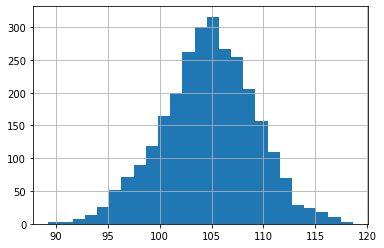

In [ ]:
homer_df['launch_speed'].hist(bins=25, figsize=[6,4])

Histograms are great for understanding the distribution of a variable, and you can do a lot more with the plot above - if you want to get ahead of the curve you can [read this page on Pandas histograms](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html).

Another useful thing we can do is see how column values are distribution. We do this the value_counts() function like this:

In [ ]:
sav['events'].value_counts()

field_out                     33895
strikeout                     20989
single                        11929
walk                           7501
double                         3670
home_run                       2774
force_out                      1852
grounded_into_double_play      1606
hit_by_pitch                   1022
field_error                     644
sac_fly                         535
sac_bunt                        370
triple                          316
fielders_choice                 213
double_play                     189
fielders_choice_out             130
caught_stealing_2b               69
strikeout_double_play            56
catcher_interf                   34
other_out                        24
sac_fly_double_play               6
pickoff_2b                        5
caught_stealing_3b                5
triple_play                       5
wild_pitch                        5
pickoff_1b                        3
game_advisory                     2
pickoff_caught_stealing_2b  

that shows you how many times each event happened in the data set. To show the results are percentages rather than counts, add this:

In [ ]:
sav['events'].value_counts(normalize=True)

field_out                     0.385806
strikeout                     0.238905
single                        0.135781
walk                          0.085379
double                        0.041773
home_run                      0.031575
force_out                     0.021080
grounded_into_double_play     0.018280
hit_by_pitch                  0.011633
field_error                   0.007330
sac_fly                       0.006090
sac_bunt                      0.004211
triple                        0.003597
fielders_choice               0.002424
double_play                   0.002151
fielders_choice_out           0.001480
caught_stealing_2b            0.000785
strikeout_double_play         0.000637
catcher_interf                0.000387
other_out                     0.000273
sac_fly_double_play           0.000068
pickoff_2b                    0.000057
caught_stealing_3b            0.000057
triple_play                   0.000057
wild_pitch                    0.000057
pickoff_1b               

Here's the full list of columns, you can go through and see how they all break down with the code above. 

Don't forget about the [CSV documentation resource](https://baseballsavant.mlb.com/csv-docs) that tells you what all these columns is

In [ ]:
print(list(sav.columns))

['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher', 'events', 'description', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', '

### Display a single at-bat

This may be useful to get a better understanding of how the data is populated. Here's an example of a full batter vs. pitcher matchup that happened

In [ ]:
example_ab = sav[(sav['game_date']=='2021-04-01') & (sav['BatterName']=='Mike Trout') & (sav['player_name']=='Lucas Giolito') & sav['inning']==1]
example_ab[['game_date','inning','at_bat_number','pitch_number','BatterName','player_name','pitch_type','description','events']].sort_values(by='pitch_number')

,game_date,inning,at_bat_number,pitch_number,BatterName,player_name,pitch_type,description,events
340735,2021-04-01,1,7,1,Mike Trout,Lucas Giolito,FF,called_strike,NaN
340734,2021-04-01,1,7,2,Mike Trout,Lucas Giolito,SL,ball,NaN
340733,2021-04-01,1,7,3,Mike Trout,Lucas Giolito,CH,called_strike,NaN
340732,2021-04-01,1,7,4,Mike Trout,Lucas Giolito,FF,foul,NaN
340731,2021-04-01,1,7,5,Mike Trout,Lucas Giolito,FF,ball,NaN
340730,2021-04-01,1,7,6,Mike Trout,Lucas Giolito,SL,ball,NaN
340729,2021-04-01,1,7,7,Mike Trout,Lucas Giolito,CH,swinging_strike,strikeout


You can see there that Lucas Giolito struck out Mike Trout on seven pitches, eventually getting him with a changeup that he swung and missed at.

### more examples

see hardest thrown pitchers of the year

In [ ]:
sav[['player_name','release_speed','events','description']].sort_values(by='release_speed',ascending=False).head(5)

,player_name,release_speed,events,description
39297,Aroldis Chapman,103.4,strikeout,swinging_strike
319715,Jordan Hicks,103.2,NaN,foul
164972,Aroldis Chapman,102.8,strikeout,called_strike
195055,Jose Alvarado,102.5,NaN,blocked_ball
319714,Jordan Hicks,102.5,NaN,foul


the NaN event just tells you that the plate appearance did not end on that pitch, the "description" field actually gives you the result of the pitch, here's all the possible description, you'll see it covers everything that can happen with a pitch

In [ ]:
print(sav['description'].unique())

['hit_into_play' 'foul' 'ball' 'called_strike' 'blocked_ball' 'foul_bunt'
 'swinging_strike' 'foul_tip' 'swinging_strike_blocked' 'hit_by_pitch'
 'missed_bunt' 'bunt_foul_tip' 'pitchout' 'foul_pitchout']


# Savant Dataset Columns Overview

Here we'll break down the most usefulcolumns in the baseball savant data, you can use this as a reference point to find the columns you're looking for

In [ ]:
sav.columns

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',


## Game, Team and Player Information

We already know **player_name** and **BatterName**, so here are some columns that tell us more about them

p_throws tells us the handedness of the pitcher, and **stand** tells us the handedness of the batter

In [ ]:
print(sav['p_throws'].unique())
print('\n')
print(sav['stand'].unique())

['R' 'L']


['R' 'L']


Some self-explanatory columns:
**home_team**

**home_score**

**away_team** 

**away_score**

**game_date**

**inning**

**inning_topbot**

**outs_when_up**

**on_3b**

**on_2b**

**on_1b** 

those last three are the player IDs of the base runners

In [ ]:
sav = sav.sort_values(by=['game_date','inning','at_bat_number','pitch_number'])
sav[['game_date','away_team','away_score','home_team','home_score','player_name','BatterName','inning','inning_topbot','outs_when_up','on_1b','on_2b','on_3b']].head(1)

,game_date,away_team,away_score,home_team,home_score,player_name,BatterName,inning,inning_topbot,outs_when_up,on_1b,on_2b,on_3b
340762,2021-04-01,CWS,0,LAA,0,Dylan Bundy,Tim Anderson,1,Top,0,NaN,NaN,NaN


^ That data will change as we reshuffle the data and what, but what you see there is pretty self-explanatory. It shows you a pitcher hitter matchup and the context of it. 

## Pitch Information

**pitch_name** and **pitch_type** tell you what pitch was thrown:

In [ ]:
print(sav['pitch_name'].unique())
print('\n')
print(sav['pitch_type'].unique())

['4-Seam Fastball' 'Sinker' 'Cutter' 'Slider' 'Curveball' 'Changeup'
 'Knuckle Curve' 'Split-Finger' 'Fastball' 'Screwball' 'Eephus'
 'Knuckleball' nan '2-Seam Fastball']


['FF' 'SI' 'FC' 'SL' 'CU' 'CH' 'KC' 'FS' 'CS' 'FA' 'SC' 'EP' 'KN' nan 'FT']


I'll make a [python dictionary](https://www.w3schools.com/python/python_dictionaries.asp) here to show you which type corresponds with each pitch

In [ ]:
pitch_dict = dict(zip(sav.pitch_name, sav.pitch_type))
pitch_dict_df = pd.DataFrame([pitch_dict]).T.reset_index()
pitch_dict_df.columns=['Pitch Name','Pitch Type']
pitch_dict_df

,Pitch Name,Pitch Type
0,4-Seam Fastball,FF
1,Sinker,SI
2,Cutter,FC
3,Slider,SL
4,Curveball,CU
5,Changeup,CH
6,Knuckle Curve,KC
7,Split-Finger,FS
8,Fastball,FA
9,Screwball,SC


There are a bunch of columns that tell us data about the pitch movement

**release_speed** is the velocity of the pitch

**release_spin_rate** is the spin rate of the pitch

here's the distributions of these pitches for the four-seamer

In [ ]:
sav[sav['pitch_type']=='FF']['release_speed'].describe()

count    120121.000000
mean         93.686298
std           2.533338
min          62.400000
25%          92.200000
50%          93.800000
75%          95.400000
max         102.200000
Name: release_speed, dtype: float64

In [ ]:
sav[sav['pitch_type']=='FF']['release_spin_rate'].describe()

count    119568.000000
mean       2299.682465
std         193.941276
min         121.000000
25%        2173.000000
50%        2302.000000
75%        2427.000000
max        3594.000000
Name: release_spin_rate, dtype: float64

**spin_axis** tells you the Spin Axis in the 2D X-Z plane in degrees from 0 to 360, such that 180 represents a pure backspin fastball and 0 degrees represents a pure topspin (12-6) curveball

Here's the average spin_axis for each pitch type, don't worry too much about the groupby function I use here - we will learn that in a later lesson

In [ ]:
sav.groupby('pitch_type', as_index=False)['spin_axis'].mean().sort_values(by='spin_axis')

,pitch_type,spin_axis
9,KC,74.537812
2,CU,122.389687
1,CS,122.738095
13,SL,145.728079
10,KN,167.724638
5,FC,172.363496
6,FF,192.871289
3,EP,195.095238
0,CH,196.224728
12,SI,196.476402


**zone** is where the pitch is located in the strike zone, those zones break down like this

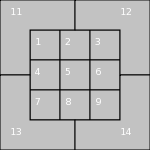

Here's how pitches have been distributed in those zones:

In [ ]:
sav['zone'].value_counts(normalize=True)

14.0    0.188295
13.0    0.127449
11.0    0.109122
12.0    0.083921
5.0     0.074574
8.0     0.063684
6.0     0.060916
4.0     0.059447
9.0     0.056668
2.0     0.049344
7.0     0.048313
1.0     0.041190
3.0     0.037078
Name: zone, dtype: float64

The movement information is more complex, but here are the columns

**pfx_x** horizontal movement in feet (from catcher's perspective)

**pfx_z** vertical movement

**ax** acceleration of the pitch (feet per second) in x-dimension (horizontal)

**az** acceleration in the downward direction

**ay** acceleration in the forward direction (relates to the velocity of the pitch)

We don't really need to worry about these right now, but we'll show these values for a Tyler Glasnow curveball anyways


In [ ]:
glasnow_cu = sav[(sav['player_name']=='Tyler Glasnow') & (sav['pitch_type']=='CU')].head(1)
glasnow_cu[['player_name','pitch_type','pfx_x','pfx_z','ax','az','ay','release_speed','release_spin_rate','zone']]

,player_name,pitch_type,pfx_x,pfx_z,ax,az,ay,release_speed,release_spin_rate,zone
340994,Tyler Glasnow,CU,0.71,-1.17,5.879262,-42.129916,30.714244,85.8,3131.0,14.0


Let's compare those numbers with a Gerrit Cole fastball, that should give you an idea of which columsn mean what since a Glasnow curveball will move slower and more vertically while a Cole fastball is quite fast and straight.

In [ ]:
cole_ff = sav[(sav['player_name']=='Gerrit Cole') & (sav['pitch_type']=='FF')].head(1)
cole_ff[['player_name','pitch_type','pfx_x','pfx_z','ax','az','ay','release_speed','release_spin_rate','zone']]

,player_name,pitch_type,pfx_x,pfx_z,ax,az,ay,release_speed,release_spin_rate,zone
341640,Gerrit Cole,FF,-0.91,1.6,-13.834897,-9.702751,33.130446,97.7,2673.0,11.0


## Event Information

There are a bunch of columns that actually tell you what happened, let's go over them

**type** shows you one of three options

* S = strike (this could be called, swinging, or foul ball)
* B = ball
* X = ball put in play (fair territory)



In [ ]:
sav['type'].unique()

array(['S', 'B', 'X'], dtype=object)

bb_type will be a subset of the "X" above, it only applies to balls put in play. It tells you one of four options:
* fly ball
* ground ball
* line drive
* pop up

These are classified based on the launch angle. "nan" will be balls that weren't put in play.

In [ ]:
sav['bb_type'].unique()

array([nan, 'fly_ball', 'ground_ball', 'line_drive', 'popup'],
      dtype=object)

**hit_location** gives you the field number of the first fielder to touch the ball, this gives you some idea of where the batted ball ended up. It follows the traditional numbering system that you're used to (1=P, 2=C, 3=1B, 4=2B, 5=3B, 6=SS, 7=LF, 8=CF, 9=RF

"nan" will be pitches that weren't put in fair territory or were home runs (meaning no fielder touched them)

In [ ]:
sav['hit_location'].unique()

array([nan,  8.,  6.,  4.,  3.,  7.,  2.,  9.,  5.,  1.])

Here are the "statcast" metrics that you're used to seeing

**launch_speed** = exit velocity

**launch_angle** = launch angle

**launch_speed_angle** is where barrels come up. Baseball savant breaks down batted balls into six categories based on the combination of their launch_speed and launch_angle

* 6 = "barrels"
* 5 = "solid"
* 4 = "flares"
* 3 = "under"
* 2 = "topped"
* 1 = "weak"

I will make a visualization to show how these break down, because it's important and interseting to understand. Don't worry about the code used to create the visualization for now.

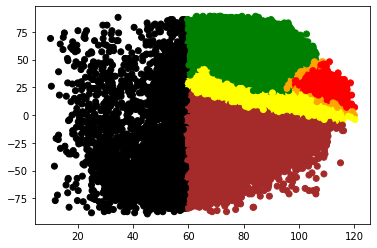

In [ ]:
import matplotlib.pyplot as plt
colordict = {1: 'black', 2: 'brown', 3: 'green', 4: 'yellow', 5: 'orange', 6: 'red'}
inplaysav = sav[sav['type']=='X'][['launch_speed','launch_angle','launch_speed_angle']]
inplaysav = inplaysav.dropna()

inplaysav['color'] = inplaysav['launch_speed_angle'].map(colordict)
anglelist = list(inplaysav['launch_angle'])
velolist = list(inplaysav['launch_speed'])
colorlist = list(inplaysav['color'])

fig, ax = plt.subplots()
ax.scatter(velolist,anglelist, c=colorlist)

plt.show()

You see above the x-axis is the launch velocities and the y-axis is the angles. 

The red dots are "barrels", you can see the angle range is dynamic and changes based on what the velo was (about half of these batted balls end up being home runs, with most of the rest being other extra-base hits. Only about 20% of the time these are caught for an out)

The orange dots are the "solid contact", these are almost barrels but just outside of the needed range (some of these end up being homers but most are fly outs or doubles)

Yellow are "flares", which are basically weakly hit line-drives (these go for singles and doubles quite a bit)

Green are "under" which are weak pop-ups (usually outs)

Brown are "topped" which are weak ground-balls (usually outs)

Black is just balls hit under 60mph at any angle (bunts or tappers, stuff like that).




We also have a couple columns that have to do with "expected stats"

**estimated_ba_using_speedangle**: This is the average batting average of balls hit at this angle/velocity combination

**estimated_woba_using_speedangle**: This is the average weight on base average of balls hit at this angle/velocity combination

If you're following me here, you'll understand these numbers will be highest for the 6's and 5's in the launch_speed_angle column

We'll use the "**groupby**" function here to average out these values for each different launch_speed_angle value, don't worry too much about **groupby** right now, we'll go over it later.

In [ ]:
sav.groupby('launch_speed_angle', as_index=False)['estimated_ba_using_speedangle'].mean()

,launch_speed_angle,estimated_ba_using_speedangle
0,1.0,0.174979
1,2.0,0.179508
2,3.0,0.064914
3,4.0,0.649915
4,5.0,0.461276
5,6.0,0.761883


So there you can see that barrels go for a hit 76.1% of the time.

Let's do the same for wOBA

In [ ]:
sav.groupby('launch_speed_angle', as_index=False)['estimated_woba_using_speedangle'].mean()

,launch_speed_angle,estimated_woba_using_speedangle
0,1.0,0.163080
1,2.0,0.166754
2,3.0,0.078733
3,4.0,0.616682
4,5.0,0.606790
5,6.0,1.351744


There are two columsn that tell you about how an event change the expected results of the game

**delta_home_win_exp** this is how much the home team's win percentage changed because of the event

**delta_run_exp** this shows you how much the expected run total changed from the event

Let's see the highest values of both to get a better idea

In [ ]:
sav[['player_name','inning','home_score','away_score','events','des','delta_run_exp']].sort_values(by='delta_run_exp',ascending=False).head(3)

,player_name,inning,home_score,away_score,events,des,delta_run_exp
164018,Kevin Ginkel,7,4,1,home_run,Gavin Lux hits a grand slam (2) to right field...,3.619
229779,Triston McKenzie,2,1,0,home_run,Tim Anderson hits a grand slam (4) to right ce...,3.532
49981,A.J. Minter,7,7,6,home_run,Christian Arroyo hits a grand slam (4) to left...,3.532


In [ ]:
sav[['player_name','inning','home_score','away_score','events','des','delta_home_win_exp']].sort_values(by='delta_home_win_exp',ascending=False).head(3)

,player_name,inning,home_score,away_score,events,des,delta_home_win_exp
80491,Will Smith,9,0,1,home_run,Luke Williams homers (1) on a line drive to le...,0.904
125915,Justin Wilson,10,1,2,home_run,Robbie Grossman homers (6) on a fly ball to le...,0.840
285444,Jarlin Garcia,10,5,6,double,Jorge Alfaro doubles (1) on a sharp line drive...,0.831


You can see the highest run expectation changers are grand slams and the highest win probability changers are walk off homers, makes total sense and that should give you a good idea of what these numbers mean

# Conclusion

That will conclude this notebook, I hope it gave you a good base understanding of what pandas is and how generally to use it, as well as teaching you a lot about the data set itself.

This stuff is fundamental knowledge that you need to have in order to do cool stuff with the dataset, so this is a really important notebook. I wouldn't move on to the next one until you've gone through this a couple times.